In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("D:\\Datasets\\student_mental_health.csv")

In [3]:
df.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [4]:
df.shape

(101, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

In [6]:
df.isna().sum()

Timestamp                                       0
Choose your gender                              0
Age                                             1
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

In [7]:
df["Your current year of Study"].unique()

array(['year 1', 'year 2', 'Year 1', 'year 3', 'year 4', 'Year 2',
       'Year 3'], dtype=object)

In [8]:
df["Your current year of Study"] = df["Your current year of Study"].str.lower()

In [9]:
null_age_indices = df.loc[ df["Age"].isnull() ].index

In [10]:
null_age_indices

Int64Index([43], dtype='int64')

In [11]:
estimate_age_based_on_study_year = {
    '1':18,'2':20,'3':21,'4':22,
}

for idx in null_age_indices:
    temp_year_list = df.iloc[idx]["Your current year of Study"].split(' ')
    age = estimate_age_based_on_study_year[temp_year_list[1]]
    df.loc[idx,'Age'] = age

In [12]:
df.isna().sum()

Timestamp                                       0
Choose your gender                              0
Age                                             0
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


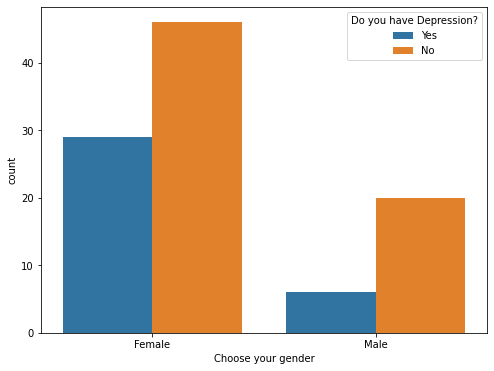

In [13]:
plt.figure(figsize=(8,6))
sns.countplot(df["Choose your gender"],hue=df["Do you have Depression?"])
plt.show()

C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


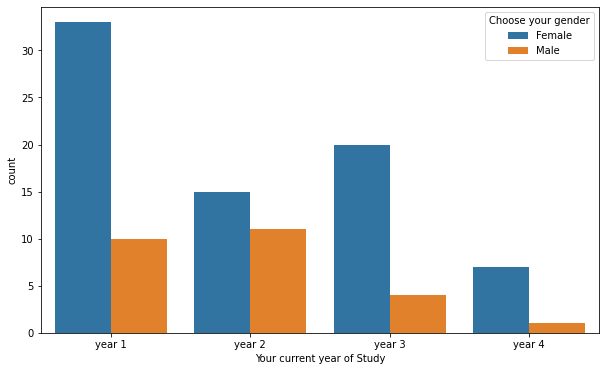

In [14]:
plt.figure(figsize=(10,6))
sns.countplot(df["Your current year of Study"], hue=df["Choose your gender"])
plt.show()

C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


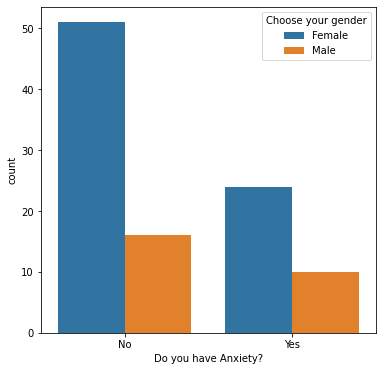

In [15]:
plt.figure(figsize=(6,6))
sns.countplot(df["Do you have Anxiety?"], hue=df["Choose your gender"])
plt.show()

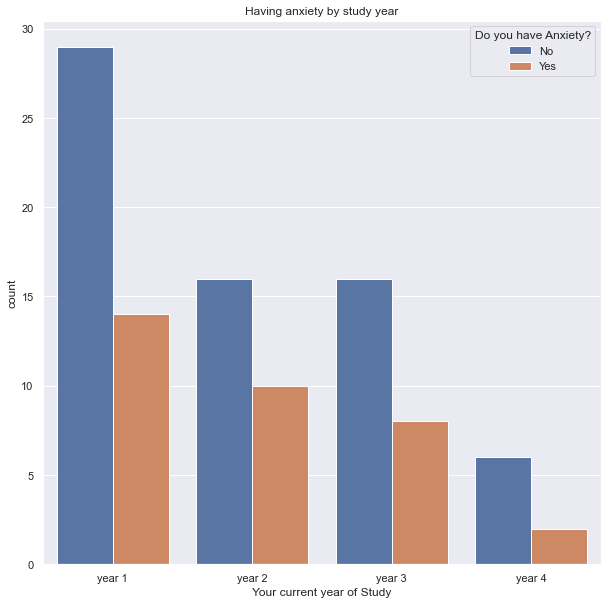

In [16]:
plt.figure(figsize=(10,10))
sns.set_theme(style="darkgrid")
sns.countplot(x="Your current year of Study", hue="Do you have Anxiety?", data=df)
plt.title("Having anxiety by study year")
plt.show()

In [17]:
student_count_by_study_year = df["Your current year of Study"].value_counts()

In [18]:
student_count_by_study_year

year 1    43
year 2    26
year 3    24
year 4     8
Name: Your current year of Study, dtype: int64

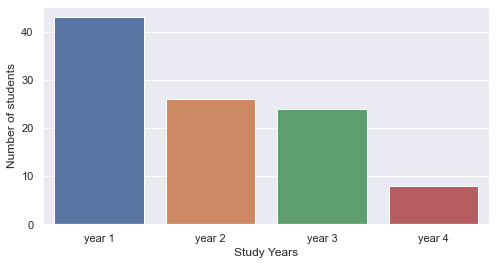

In [76]:
plt.figure(figsize=(8,4))
student_count_by_study_year_plot = sns.barplot(x=student_count_by_study_year.index, y=student_count_by_study_year)
student_count_by_study_year_plot.set(xlabel="Study Years", ylabel="Number of students")
plt.show()

In [40]:
df.loc[ df["Your current year of Study"] == "year 1" ].shape[0]

43

In [45]:
df.loc[ (df["Your current year of Study"] == "year 1" ) & (df["Do you have Anxiety?"] == "Yes") ].shape[0]

14

In [61]:
filter1 =  df["Do you have Anxiety?"] == "Yes" 

In [62]:
df1 = df[filter1].groupby("Your current year of Study")['Do you have Anxiety?'].count() / df.groupby("Your current year of Study")['Do you have Anxiety?'].count() * 100

In [63]:
df2 = 100 - df1

In [64]:
df2

Your current year of Study
year 1    67.441860
year 2    61.538462
year 3    66.666667
year 4    75.000000
Name: Do you have Anxiety?, dtype: float64

In [65]:
combine_df = pd.concat([df1, df2],axis=1)
combine_df.columns = ["Yes", "No"]
combine_df

,Yes,No
Your current year of Study,,
year 1,32.558140,67.441860
year 2,38.461538,61.538462
year 3,33.333333,66.666667
year 4,25.000000,75.000000


<AxesSubplot:title={'center':'hh'}, xlabel='Your current year of Study', ylabel='Have Anxiety'>

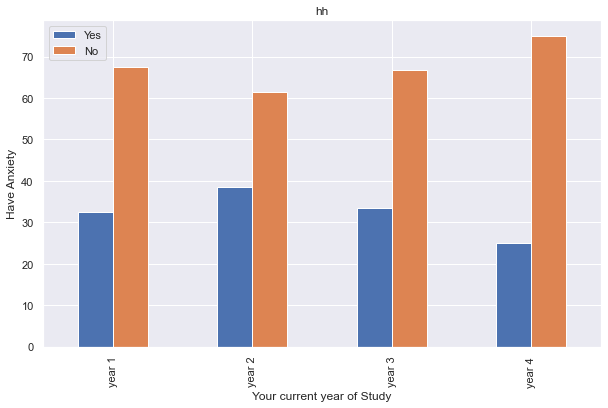

In [67]:
combine_df.plot(kind='bar', figsize=(10,6), xlabel="Your current year of Study", ylabel="Have Anxiety", title="hh")

In [68]:
filter2 = df["Do you have Depression?"] == "Yes"

In [69]:
dp = df[filter2].groupby("Your current year of Study")["Do you have Depression?"].count() / df.groupby("Your current year of Study")["Do you have Depression?"].count() * 100

In [70]:
dp

Your current year of Study
year 1    32.558140
year 2    38.461538
year 3    41.666667
year 4    12.500000
Name: Do you have Depression?, dtype: float64

In [71]:
dp1 = 100 - dp
dp1

Your current year of Study
year 1    67.441860
year 2    61.538462
year 3    58.333333
year 4    87.500000
Name: Do you have Depression?, dtype: float64

In [72]:
combine_dp = pd.concat([dp, dp1], axis=1)
combine_dp.columns = ["Yes", "No"]
combine_dp

,Yes,No
Your current year of Study,,
year 1,32.558140,67.441860
year 2,38.461538,61.538462
year 3,41.666667,58.333333
year 4,12.500000,87.500000


<AxesSubplot:title={'center':'Average of students who have depression for each study year'}, xlabel='Year of study', ylabel='Percentage of students who have depression'>

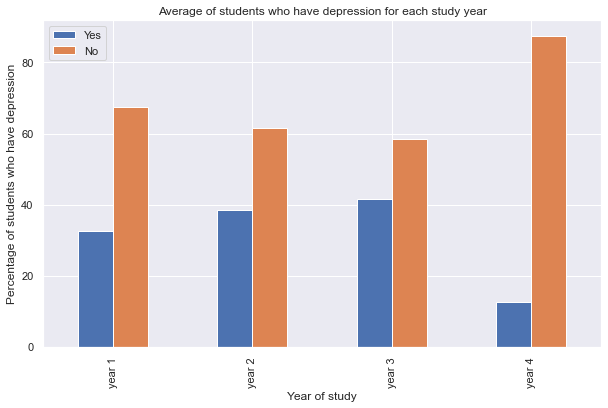

In [74]:
combine_dp.plot(kind='bar',xlabel="Year of study", ylabel="Percentage of students who have depression", title="Average of students who have depression for each study year",figsize=(10,6))